Lineal and Poly Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Proj, transform
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

data = pd.read_csv("..\\datasets\\CBS_2021-2023_Full.csv")

D:\Users\Olunia\AppData\Local\Temp\ipykernel_15832\709363491.py:10: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("..\\datasets\\CBS_2021-2023_Full.csv")


In [2]:
weather = pd.read_csv("..\\datasets\\CBS_2021-2023_Daily_Weather.csv")

In [3]:
elevation = pd.read_csv("..\\src\\elevation_data.csv")

In [4]:
data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [5]:
data = data.dropna(subset= ['start_lat','start_lng','end_lat','end_lng'])

In [6]:
data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      794519
end_station_id        794519
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [7]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [8]:
data_electric = data[data['rideable_type'] == 'electric_bike']

In [9]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [10]:
weather

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8


In [11]:
import pandas as pd

# Ensure both columns are in datetime format
weather['Date'] = pd.to_datetime(weather['Date'])
data['started_at'] = pd.to_datetime(data['started_at'])

# Remove the time component to match only by date
weather['date_only'] = weather['Date'].dt.date
data['date_only'] = data['started_at'].dt.date

# Perform the merge based on the date
merged_df = pd.merge(data, weather, on='date_only', how='inner')  # Use 'left' if needed


In [12]:
merged_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,date_only,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,member,2021-01-01,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,...,casual,2021-01-01,371,2021-01-01,590,961,-0.9,2.3,63,10.6
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,member,2021-01-01,371,2021-01-01,590,961,-0.9,2.3,63,10.6
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,member,2021-01-01,371,2021-01-01,590,961,-0.9,2.3,63,10.6
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,member,2021-01-01,371,2021-01-01,590,961,-0.9,2.3,63,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677227,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,...,member,2023-12-31,2839,2023-12-31,4488,7327,-8.9,-4.6,0,10.2
10677228,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,...,member,2023-12-31,2839,2023-12-31,4488,7327,-8.9,-4.6,0,10.2
10677229,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,...,casual,2023-12-31,2839,2023-12-31,4488,7327,-8.9,-4.6,0,10.2
10677230,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,...,casual,2023-12-31,2839,2023-12-31,4488,7327,-8.9,-4.6,0,10.2


In [13]:
merged_df['weathercode (wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65], dtype=int64)

In [14]:
numeric_df = merged_df.select_dtypes(include=['number'])


In [15]:
correlation_matrix = numeric_df.corr()


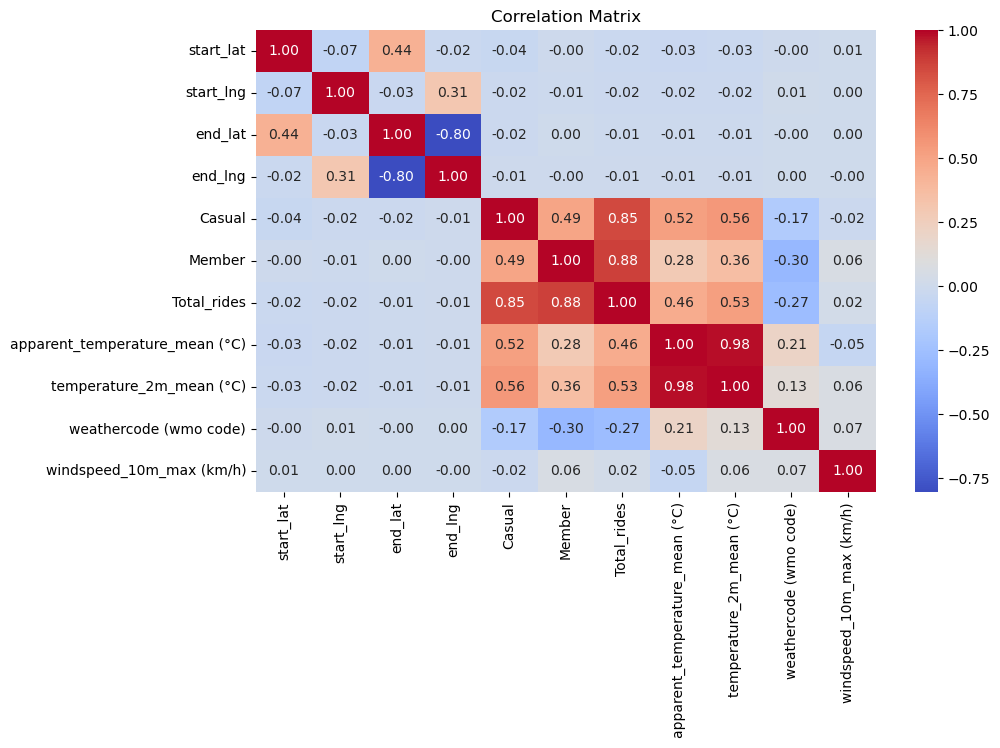

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Select relevant features, skipping 'member_casual'
X = merged_df[['windspeed_10m_max (km/h)','temperature_2m_mean (°C)']]
y = merged_df['Total_rides']


# Create polynomial features (degree 2 for example)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8698636.586199293


In [19]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.3625653302561681


Mean Squared Error: 7358912.913711364


d:\Users\Olunia\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\Users\Olunia\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


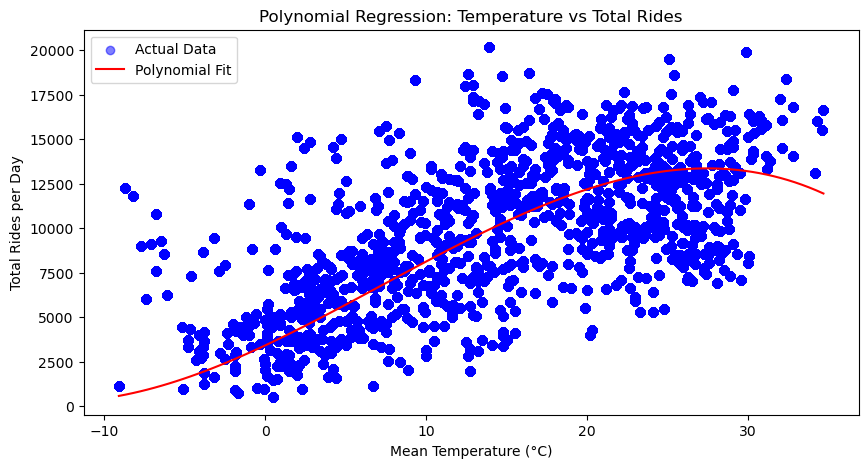

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming merged_df is already loaded with the correct data

# Select relevant features (temperature and weathercode)
X = merged_df[['temperature_2m_mean (°C)', 'weathercode (wmo code)']]
y = merged_df['Total_rides']

# Create polynomial features (degree 2 for example)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot results (Temperature vs Total Rides and Weather Code vs Total Rides)
plt.figure(figsize=(10,5))

# Scatter plot of actual data
plt.scatter(merged_df['temperature_2m_mean (°C)'], merged_df['Total_rides'], alpha=0.5, label="Actual Data", color='blue')

# Generate temperature range for polynomial regression line
temp_range = np.linspace(X['temperature_2m_mean (°C)'].min(), X['temperature_2m_mean (°C)'].max(), 100)

# Use average weather code for prediction
weather_code_mean = np.full((100,), X['weathercode (wmo code)'].mean())

# Transform new data into polynomial features
X_poly_plot = poly.transform(np.c_[temp_range, weather_code_mean])

# Predict using the model
y_poly_pred = model.predict(X_poly_plot)

# Plot polynomial regression line
plt.plot(temp_range, y_poly_pred, color='red', label="Polynomial Fit")

# Labels and title
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Total Rides per Day")
plt.title("Polynomial Regression: Temperature vs Total Rides")
plt.legend()

plt.show()

In [36]:
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

R-squared: 0.46074006238317966


In [37]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
root_mean_squared_error(y_test, y_pred)

2712.7316331903094

In [38]:
mean_absolute_error(y_test, y_pred)

2156.5128056336916

D:\Users\Olunia\AppData\Local\Temp\ipykernel_15832\1932579914.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_grouped, x='weather_category', y='Total_rides', palette='viridis')


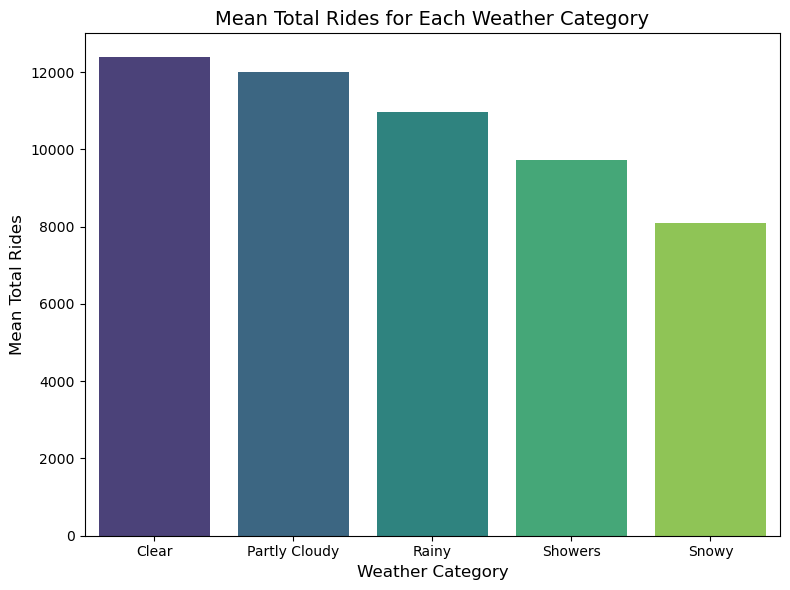

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_weather(weather_code):
    if weather_code in [0, 1]:
        return 'Clear'
    elif weather_code in [2, 3]:
        return 'Partly Cloudy'
    elif weather_code in [53, 61]: 
        return 'Showers'
    elif weather_code in [63, 51, 65]: 
        return 'Rainy'
    elif weather_code in [73, 71, 75, 55]: 
        return 'Snowy'
    else:
        return 'Unknown'


# Apply the categorize function to the weather code column
merged_df['weather_category'] = merged_df['weathercode (wmo code)'].apply(categorize_weather)

# Step 2: Group by weather category and calculate the mean of Total_rides
weather_grouped = merged_df.groupby('weather_category')['Total_rides'].mean().reset_index()

# Step 3: Plot the results using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=weather_grouped, x='weather_category', y='Total_rides', palette='viridis')

# Adding labels and title
plt.title("Mean Total Rides for Each Weather Category", fontsize=14)
plt.xlabel("Weather Category", fontsize=12)
plt.ylabel("Mean Total Rides", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



In [23]:
merged_df['weathercode (wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65], dtype=int64)